In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from umap import UMAP
import pandas as pd
sns.set_style("ticks")

In [2]:
from dsl2som import DS2LSOM
from sklearn.datasets import load_digits
mnist_X = load_digits().images.reshape(1797, -1)
mnist_y = load_digits().target
test = DS2LSOM(threshold=0)
test.fit(mnist_X)

Mnist
-----

In [3]:
reducer_2d = UMAP(
    densmap=True
)

reducer_4d = UMAP(
    n_components=4,
    densmap=True,
    min_dist=0.01
)

embedding_2d = reducer_2d.fit_transform(X=mnist_X)
embedding_4d = reducer_4d.fit_transform(mnist_X)

<AxesSubplot:>

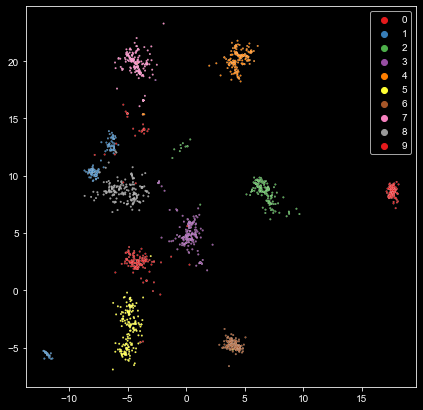

In [4]:
plt.figure(figsize=(7,7))
sns.scatterplot(
    x=embedding_2d[:,0],
    y=embedding_2d[:,1],
    hue=mnist_y,
    palette="Set1",
    s=3
)

Anzahl Cluster: : 11


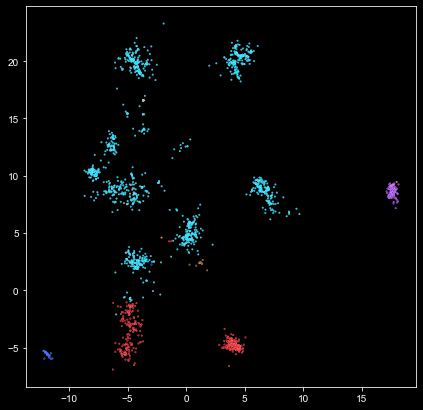

In [5]:
plt.figure(figsize=(7,7))
sns.scatterplot(
    s=3,
    x=embedding_2d[:,0],
    y=embedding_2d[:,1],
    hue=test.predict(mnist_X),
    palette="bright",
    legend=False
)
n_clusters = len(test.predict(mnist_X).unique())
print(f"Anzahl Cluster: : {n_clusters}")

Anzahl Cluster: : 58


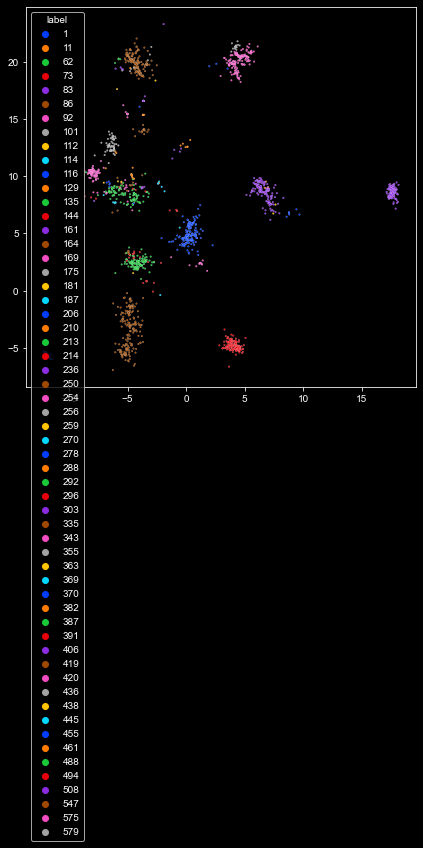

In [6]:
clusterer_4d = DS2LSOM(threshold=0)
clusterer_4d.fit(embedding_4d)

plt.figure(figsize=(7,7))
sns.scatterplot(
    s=3,
    x=embedding_2d[:,0],
    y=embedding_2d[:,1],
    hue=clusterer_4d.predict(embedding_4d),
    palette="bright",
    # legend=False
)
n_clusters = len(clusterer_4d.predict(embedding_4d).unique())
print(f"Anzahl Cluster: : {n_clusters}")

In [7]:
from collections import Counter
counts = (Counter(zip(clusterer_4d.predict(embedding_4d), mnist_y)))
df = pd.DataFrame()
for index, count in counts.items():
    df.loc[index[0], index[1]] = count
df.fillna(0, inplace=True)

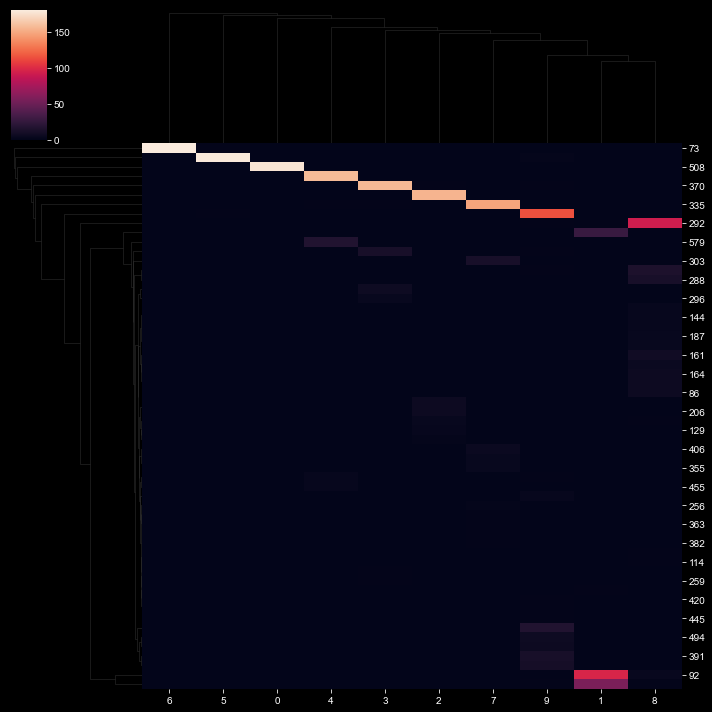

In [8]:
sns.clustermap(df)

Sklearn blob
------------

In [9]:
data = np.load("clusterable_data.npy")
clusterer = DS2LSOM(threshold=0)
pred = pd.DataFrame(clusterer.fit(data).predict(data))

In [10]:
nodes = pd.DataFrame()
nodes["density"] = 0
nodes["id_0"] = None
nodes["id_1"] = None
for i, node_data in  clusterer.graph.nodes.data():
    nodes.loc[i, "density"] = node_data["density"]
    nodes.loc[i, "label"] = node_data["label"]
    nodes.loc[i,"id_0"] = np.unravel_index(i, (clusterer.som_dim, clusterer.som_dim))[0]
    nodes.loc[i,"id_1"] = np.unravel_index(i, (clusterer.som_dim, clusterer.som_dim))[1]

Anzahl Cluster: : 47


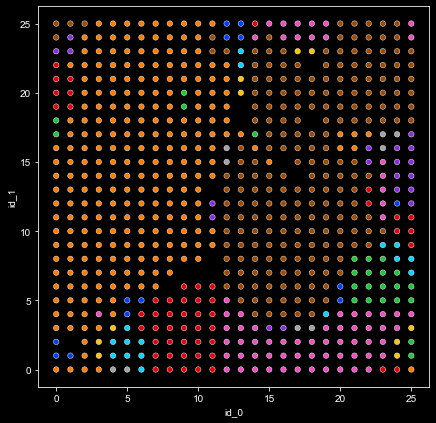

In [29]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=nodes,
    x="id_0",
    y="id_1",
    hue="label",
    palette="bright",
    legend=False,
    s=30
    # s=pred["density"]
    )

n_clusters = len(pred.label.unique())
print(f"Anzahl Cluster: : {n_clusters}")

<AxesSubplot:>

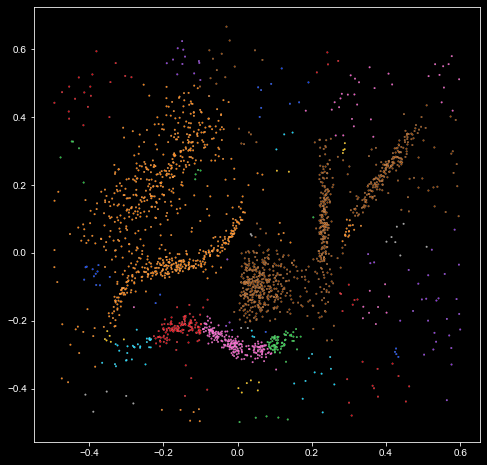

In [28]:
plt.figure(figsize=(8,8))
sns.scatterplot(
    x=data[:,0],
    y=data[:,1],
    hue=pred.label,
    # s=nodes.density,
    s=3,
    # sizes=(2,8),
    palette="bright",
    legend=False
)

In [13]:
import networkx as nx
nx.write_graphml(clusterer.graph, path="graph.graphml")

<AxesSubplot:>

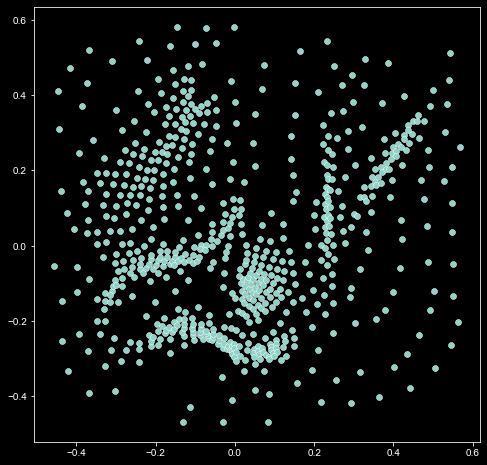

In [33]:
plt.figure(figsize=(8,8))

weights = clusterer.som._weights.reshape(-1,2)
sns.scatterplot(
    x=weights[:,0],
    y=weights[:,1],
    # size=nodes.label,
    # hue=nodes.label.to_dict(),
    palette="bright",
    legend=False,
    sizes=(5,20)
)

In [16]:
weights.shape

(676, 2)